<a href="https://colab.research.google.com/github/luiscunhacsc/finance_python/blob/main/14_Valuation_Models_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Valuation Models Implementation**

**Purpose:** Implement and visualize valuation models using Python.

**Models Covered:** Dividend Discount Models (DDM), Free Cash Flow (FCF) Valuation, and Relative Valuation.

**Importance:** Enhances understanding and application of valuation techniques.


In [ ]:
# Install necessary libraries if not already installed
%pip install -q pandas numpy matplotlib yfinance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf


## **Dividend Discount Model (DDM) Implementation**

**Scenario:** Implement the Constant Growth DDM.

**Steps:** 1. Define the DDM function. 2. Input the expected dividend, required return, and growth rate. 3. Calculate and visualize the stock price.

**Example Code:**

Stock Price (DDM): $50.00


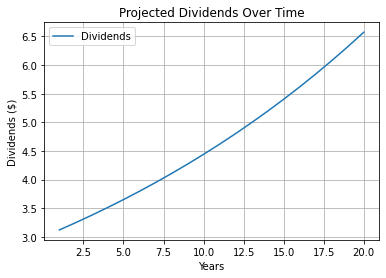

In [ ]:
# DDM Function
def ddm_valuation(expected_dividend, required_return, growth_rate):
    return expected_dividend / (required_return - growth_rate)

# Example Data
expected_dividend = 3
required_return = 0.10
growth_rate = 0.04

# FCF Valuation Function
def fcf_valuation(fcf, discount_rate, terminal_growth_rate):
    pv_fcf = sum([cf / (1 + discount_rate) ** t for t, cf in enumerate(fcf, start=1)])
    terminal_value = fcf[-1] * (1 + terminal_growth_rate) / (discount_rate - terminal_growth_rate)
    pv_terminal_value = terminal_value / (1 + discount_rate) ** len(fcf)
    return pv_fcf + pv_terminal_value

# Example Data
fcf_projections = [10000, 12000, 14000, 16000, 18000]
discount_rate = 0.08
terminal_growth_rate = 0.03


# Calculate Stock Price
stock_price = ddm_valuation(expected_dividend, required_return, growth_rate)
print(f"Stock Price (DDM): ${stock_price:.2f}")

# Visualization
years = np.arange(1, 21)
dividends = [expected_dividend * (1 + growth_rate) ** year for year in years]
plt.plot(years, dividends, label='Dividends')
plt.xlabel('Years')
plt.ylabel('Dividends ($)')
plt.title('Projected Dividends Over Time')
plt.legend()
plt.grid(True)
plt.show()


## **Free Cash Flow (FCF) Valuation Implementation**

**Scenario:** Implement the FCF Valuation model.

**Steps:**
1. Define the FCF valuation function.
2. Input projected free cash flows, discount rate, and terminal growth rate.
3. Calculate and visualize the company value.

**Example Code:**


Company Value: $307032.20


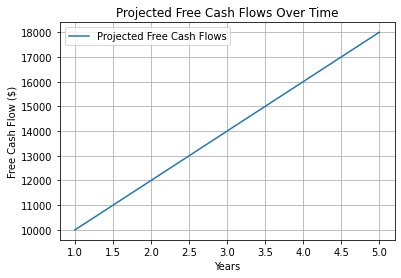

In [ ]:
# FCF Valuation Function
def fcf_valuation(fcf, discount_rate, terminal_growth_rate):
    pv_fcf = sum([cf / (1 + discount_rate) ** t for t, cf in enumerate(fcf, start=1)])
    terminal_value = fcf[-1] * (1 + terminal_growth_rate) / (discount_rate - terminal_growth_rate)
    pv_terminal_value = terminal_value / (1 + discount_rate) ** len(fcf)
    return pv_fcf + pv_terminal_value

# Example Data
fcf_projections = [10000, 12000, 14000, 16000, 18000]
discount_rate = 0.08
terminal_growth_rate = 0.03

# Calculate Company Value
company_value = fcf_valuation(fcf_projections, discount_rate, terminal_growth_rate)
print(f"Company Value: ${company_value:.2f}")

# Visualization
years = np.arange(1, len(fcf_projections) + 1)
plt.plot(years, fcf_projections, label='Projected Free Cash Flows')
plt.xlabel('Years')
plt.ylabel('Free Cash Flow ($)')
plt.title('Projected Free Cash Flows Over Time')
plt.legend()
plt.grid(True)
plt.show()


## **Relative Valuation Implementation**

**Scenario:** Perform relative valuation using P/E, P/B, P/S, and EV/EBITDA ratios.

**Steps:** 1. Gather financial data for a set of companies. 2. Calculate valuation ratios. 3. Compare ratios to industry averages or peers.

**Example Code:**


  Company  P/E Ratio  P/B Ratio  P/S Ratio  EV/EBITDA Ratio
0       A       10.0   1.250000   2.500000              6.0
1       B       10.0   1.333333   2.666667              6.0
2       C       12.0   1.200000   2.400000              6.5


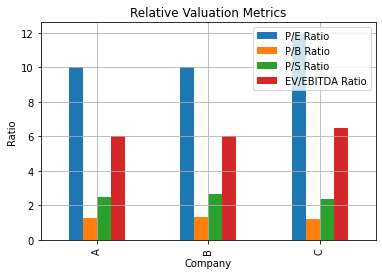

In [ ]:
# Example Data
data = {
    'Company': ['A', 'B', 'C'],
    'Market Price per Share': [50, 80, 120],
    'EPS': [5, 8, 10],
    'Book Value per Share': [40, 60, 100],
    'Market Capitalization': [500000000, 800000000, 1200000000],
    'Total Sales': [200000000, 300000000, 500000000],
    'Enterprise Value': [600000000, 900000000, 1300000000],
    'EBITDA': [100000000, 150000000, 200000000]
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate Ratios
df['P/E Ratio'] = df['Market Price per Share'] / df['EPS']
df['P/B Ratio'] = df['Market Price per Share'] / df['Book Value per Share']
df['P/S Ratio'] = df['Market Capitalization'] / df['Total Sales']
df['EV/EBITDA Ratio'] = df['Enterprise Value'] / df['EBITDA']

# Display Results
print(df[['Company', 'P/E Ratio', 'P/B Ratio', 'P/S Ratio', 'EV/EBITDA Ratio']])

# Visualization
df.set_index('Company')[['P/E Ratio', 'P/B Ratio', 'P/S Ratio', 'EV/EBITDA Ratio']].plot(kind='bar')
plt.title('Relative Valuation Metrics')
plt.xlabel('Company')
plt.ylabel('Ratio')
plt.legend()
plt.grid(True)
plt.show()


## **Comprehensive Example**

**Scenario:** Use multiple valuation models to valuate a single company.

**Steps:** 1. Implement DDM, FCF, and relative valuation models. 2. Compare results from different models. 3. Visualize and interpret the combined valuation.

**Example Code:**


  Valuation Model          Value
0             DDM      50.000000
1             FCF  307032.201129
2             P/E      10.000000
3             P/B       1.250000
4             P/S       2.500000
5       EV/EBITDA       6.000000


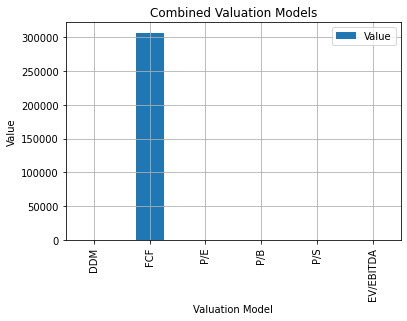

In [ ]:
# DDM Valuation
ddm_price = ddm_valuation(expected_dividend=3, required_return=0.10, growth_rate=0.04)

# FCF Valuation
fcf_price = fcf_valuation(fcf=[10000, 12000, 14000, 16000, 18000], discount_rate=0.08, terminal_growth_rate=0.03)

# Relative Valuation
relative_valuation_data = {
    'Company': ['A'],
    'Market Price per Share': [50],
    'EPS': [5],
    'Book Value per Share': [40],
    'Market Capitalization': [500000000],
    'Total Sales': [200000000],
    'Enterprise Value': [600000000],
    'EBITDA': [100000000]
}
df_relative = pd.DataFrame(relative_valuation_data)
df_relative['P/E Ratio'] = df_relative['Market Price per Share'] / df_relative['EPS']
df_relative['P/B Ratio'] = df_relative['Market Price per Share'] / df_relative['Book Value per Share']
df_relative['P/S Ratio'] = df_relative['Market Capitalization'] / df_relative['Total Sales']
df_relative['EV/EBITDA Ratio'] = df_relative['Enterprise Value'] / df_relative['EBITDA']

# Display combined results
combined_results = {
    'Valuation Model': ['DDM', 'FCF', 'P/E', 'P/B', 'P/S', 'EV/EBITDA'],
    'Value': [ddm_price, fcf_price, df_relative['P/E Ratio'][0], df_relative['P/B Ratio'][0], df_relative['P/S Ratio'][0], df_relative['EV/EBITDA Ratio'][0]]
}
df_combined = pd.DataFrame(combined_results)

print(df_combined)

# Visualization
df_combined.set_index('Valuation Model').plot(kind='bar')
plt.title('Combined Valuation Models')
plt.xlabel('Valuation Model')
plt.ylabel('Value')
plt.grid(True)
plt.show()


## **Summary**

**Valuation Models:** Implement DDM, FCF, and relative valuation using Python.

**Steps:** Define functions, input data, calculate values, and visualize results.

**Comparison:** Use multiple models to get a comprehensive view of valuation.
